In [1]:
import numpy as np
import pulp

In [2]:
prob = pulp.LpProblem('crops', pulp.LpMaximize)

corn = pulp.LpVariable('corn', lowBound=0, cat='Integer')
wheat = pulp.LpVariable('wheat', lowBound=0, cat='Integer')

In [3]:
total_land = corn + wheat
total_work_hours = 4*corn + wheat
initial_capital = 20*corn + 10*wheat
profit = 60*corn + 40*wheat

In [4]:
prob += (total_land <= 200)
prob += (total_work_hours <= 320)
prob += (initial_capital <= 2200)
prob += profit
print(prob)

crops:
MAXIMIZE
60*corn + 40*wheat + 0
SUBJECT TO
_C1: corn + wheat <= 200

_C2: 4 corn + wheat <= 320

_C3: 20 corn + 10 wheat <= 2200

VARIABLES
0 <= corn Integer
0 <= wheat Integer



In [6]:
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == pulp.LpStatusOptimal

# display the results
for var in (corn, wheat):
    print('Optimal weekly number of {} to produce: {:1.0f}'.format(var.name, var.value()))

Optimal weekly number of corn to produce: 20
Optimal weekly number of wheat to produce: 180


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

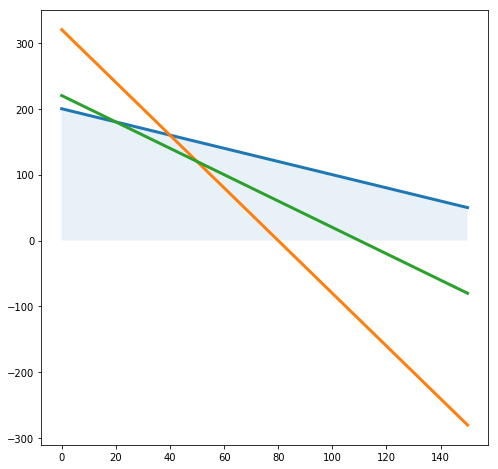

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
c = np.linspace(0, 150)

plt.plot(c, 200 - c, lw=3, label='land')
plt.fill_between(c, 0, 200 - c, alpha=0.1)
plt.plot(c, 320 - 4*c, lw=3, label='working hours')
plt.plot(c, 220 - 2*c, lw=3, label='capital')